In [1]:
pwd

'/Users/yohan/Desktop/dev_ws/yolo/src'

In [2]:
import os
os.chdir('../')

In [3]:
os.getcwd()

'/Users/yohan/Desktop/dev_ws/yolo'

In [4]:
!git clone https://github.com/ultralytics/yolov5

fatal: 대상 경로가('yolov5') 이미 있고 빈 디렉터리가 아닙니다.


In [5]:
%cd yolov5/

/Users/yohan/Desktop/dev_ws/yolo/yolov5


/opt/anaconda3/envs/yolo_venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [6]:
!pip install -qr requirements.txt

In [7]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images --name exp2 --exist-ok

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp2, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.14 torch-2.3.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/2 /Users/yohan/Desktop/dev_ws/yolo/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 51.4ms
image 2/2 /Users/yohan/Desktop/dev_ws/yolo/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, 42.9ms
Speed: 0.4ms pre-process, 47.1ms inference, 0.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


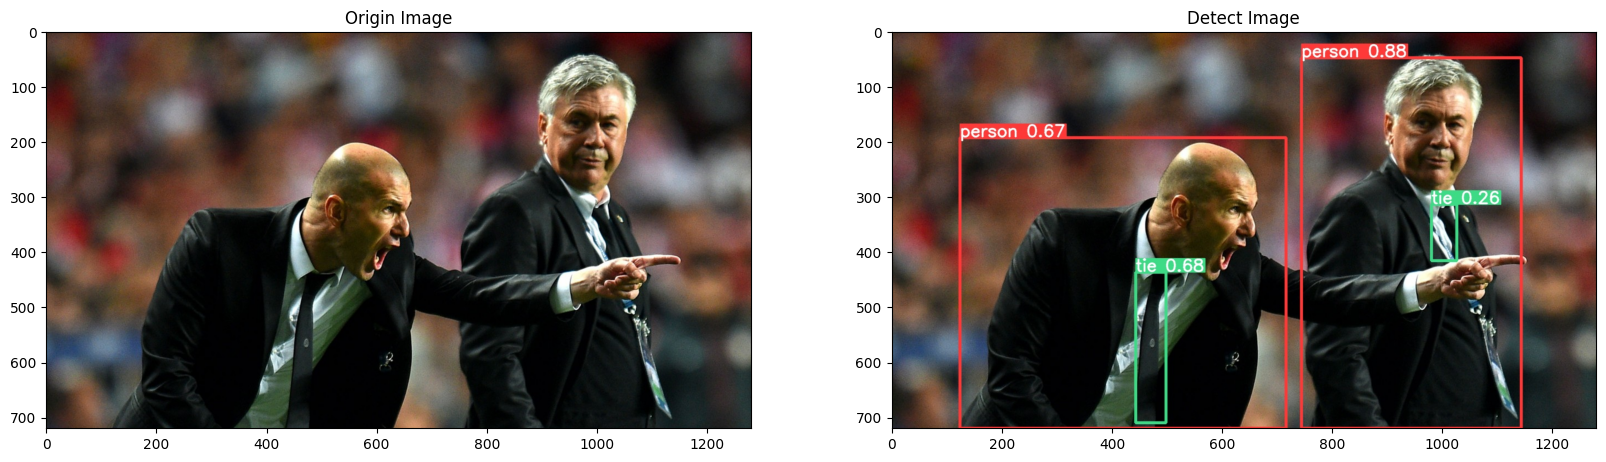

In [8]:
import matplotlib.pyplot as plt
from PIL import Image
# object detection을 수행할 이미지
origin_img = Image.open('./data/images/zidane.jpg')
# object detection을 완료한 이미지
detect_img = Image.open('./runs/detect/exp2/zidane.jpg')
# matplotlib을 이용한 2개 이상 이미지 출력
fig, ax = plt.subplots(ncols=2, figsize=(20, 15))
ax[0].imshow(origin_img)
ax[0].set_title('Origin Image')

ax[1].imshow(detect_img)
ax[1].set_title('Detect Image')

plt.show()

In [9]:
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.14 torch-2.3.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anc

In [ ]:
# 학습 지표 그래프
from PIL import Image
train_log = Image.open('./runs/train/exp/results.png')
# 이미지 원본 비율 유지하면서 사이즈 조정
long_edge_size = 800
resized_train_log = train_log.resize((long_edge_size, round(long_edge_size * train_log.size[1] / train_log.size[0])), resample=Image.LANCZOS)
resized_train_log.show()